<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>

Some questions we want to ask in this module
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [1]:
# Importacao das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Instancia o DF
df = pd.read_csv('automobileEDA.csv')

In [3]:
# Exibir as primeiras linhas
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Regressao Linear e Regressao Linear Multipla
Vamos usar uma regressao linear simples para entender a relacao entre duas variaveis:
- Variavel preditora/independente (X)
- Variavel resposta/dependente (Y) - que queremos prever.

## Regressao Linear Simples

In [4]:
# Importar a regressao linear
from sklearn.linear_model import LinearRegression

In [5]:
# Instanciar o modelo
lm = LinearRegression()
lm

LinearRegression()

#### Como a variavel "highway-mpg" pode nos ajudar a prever o preco do carro?

In [6]:
X = df[['highway-mpg']]
y = df['price']

In [7]:
# Ajustar o modelo linear
lm.fit(X, y)

LinearRegression()

In [8]:
# Faz a predicao
Yhat = lm.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
# Apresenta o valor do intercept
lm.intercept_

38423.305858157386

In [10]:
# Apresenta o valor da inclinacao da curva
lm.coef_

array([-821.73337832])

### Criar uma regressao linear chamada "l1"

In [11]:
lm1 = LinearRegression()

### Treinar a regressao usando a variavel 'engine-size' como variavel independente e 'price' como variavel dependente

In [12]:
X = df[['engine-size']]
y = df['price']

In [13]:
lm1.fit(X, y)

LinearRegression()

### Encontrar a inclinacao e o intercept da curva

In [14]:
# Inclinacao e Intercept
print(lm1.coef_, lm1.intercept_)

[166.86001569] -7963.338906281042


### Qual a equacao da linha prevista?

In [15]:
Yhat = 166.86 * X - 7963.3389
Yhat[:5]

,engine-size
0,13728.4611
1,13728.4611
2,17399.3811
3,10224.4011
4,14729.6211


## Regressao Linear Multipla

In [16]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [17]:
lm.fit(Z, y)

LinearRegression()

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [19]:
lm.intercept_

-15806.624626329223

### Criar uma regressao linear multipla com o nome "lm2". Variavel resposta "price", variaveis preditoras "normalized-losses" e "highway-mpg".

In [20]:
Z = df[['normalized-losses', 'highway-mpg']]
y = df['price']

In [21]:
# Criar a regressao
lm2 = LinearRegression()
lm2.fit(Z, y)

LinearRegression()

### Encontrar o coeficiente do modelo

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

## Avaliacao do modelo usando visualizacoes

### Plot de Regressao
Ao trabalhar com regressao linear simples, podemos usar o plot de regressao para visualizar o ajuste do modelo.

O plot ira mostrar a combinacao dos pontos de dados, e tambem a reta ajustada da regressao linear. 

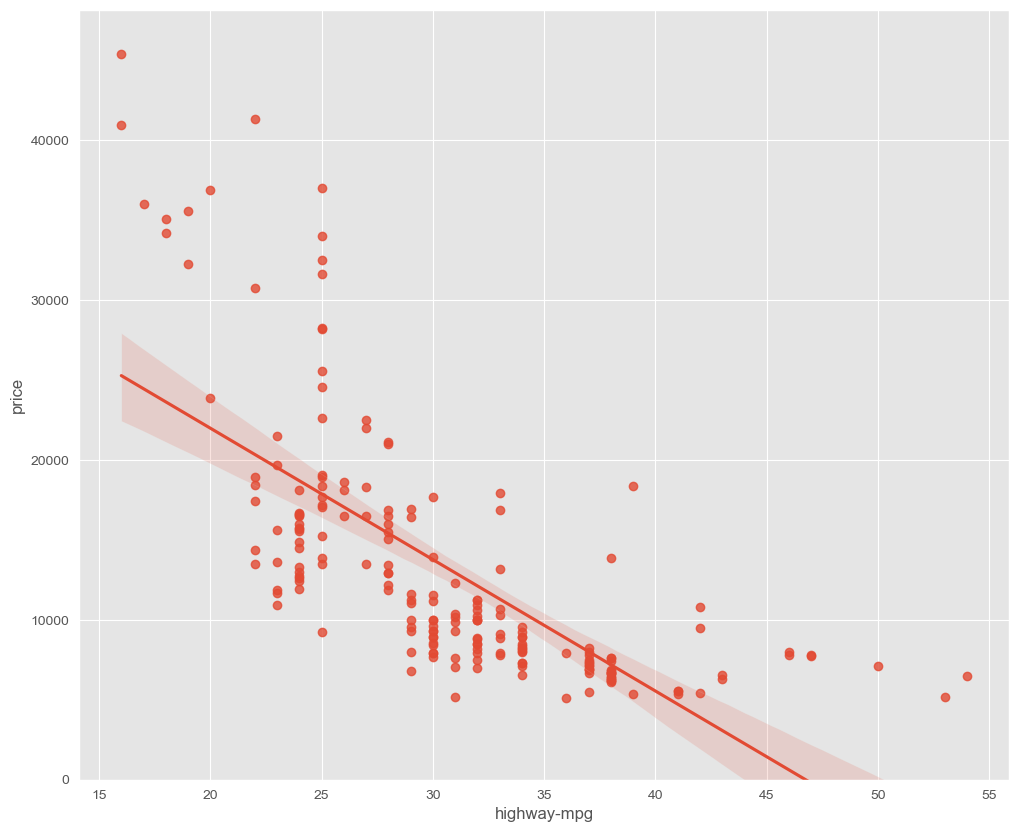

In [23]:
# Regression Plot - highway-mpg vs price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,);

Podemos observar que o grafico apresenta uma correlacao negativa entre a variavel "highway-mpg" e "price". Tambem se faz importante observarmos a distancia dos pontos com relacao a linha da regressao, pois isso pode nos fornecer informacoes sobre o quanto os dados estao variando. Se os dados estiverem muito distantes da linha, o modelo linear pode nao ser a melhor opcao para o problema.

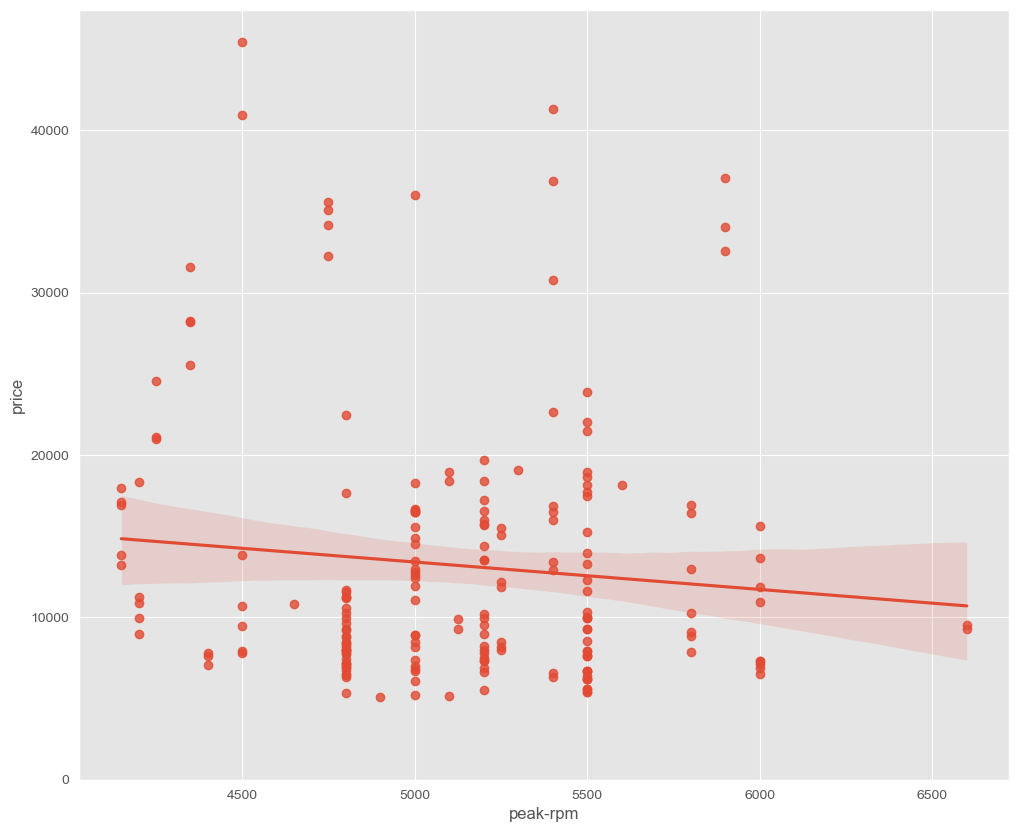

In [24]:
# Regression Plot - peak-rpm vs price
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,);

Aqui fica um pouco dificil de dizer se os pontos estao realmente caindo ou subindo, pois existe uma variacao muito grande em torno da linha de regressao.

In [25]:
# Exibir a correlacao entre as tres variaveis.
df[["peak-rpm", 'highway-mpg', "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual plot
Eh uma alternativa para visualizarmos a variacao dos dados.

O __residuo__ eh a diferenca entre o valor observado e o valor previsto. Quando olhamos para o grafico de regressao, o residuo eh a distancia que existe entre o ponto de dado e a reta ajustada.

Quando analisando um residual plot, devemos observar o quao espalhados os residuos estao. Se os pontos no residual plot estiverem __espalhados aleatoriamente ao redor do eixo x__, entao o modelo linear eh apropriado para os dados.

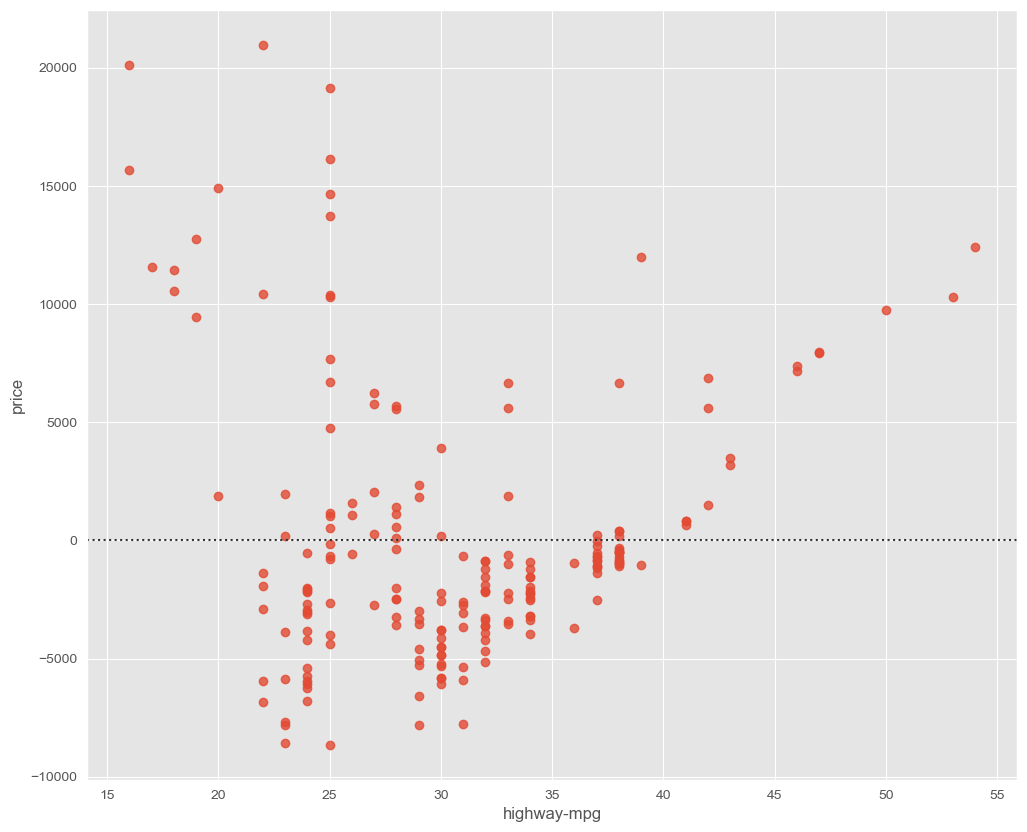

In [27]:
plt.figure(figsize=(width, height))
sns.residplot(x='highway-mpg', y='price', data=df)
plt.show();

Conseguimos perceber que os dados __nao estao__ aleatoriamente espalhados ao redor do eixo x, o que nos leva a acreditar que um modelo nao-linear pode ser uma escolha mais adequada.

### Multiple Linear Regression
Quando aplicamos uma regressao linear multipla, fica um pouco mais dificil de visualiza-lo pois nao conseguimos aplicar um residual plot ou regression plot.

Mas uma forma de verificarmos o ajuste do modelo eh olhando para um __distribution plot__. Podemos olhar para a distribuicao dos valores ajustados que resultam do modelo e compara-la com a distribuicao dos valores reais.

In [29]:
# Realizar a predicao
Yhat = lm2.predict(Z)

C:\Users\Diogo\AppData\Local\Temp\ipykernel_2352\2375823865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
C:\Users\Diogo\AppData\Local\Temp\ipykernel_2352\2375823865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

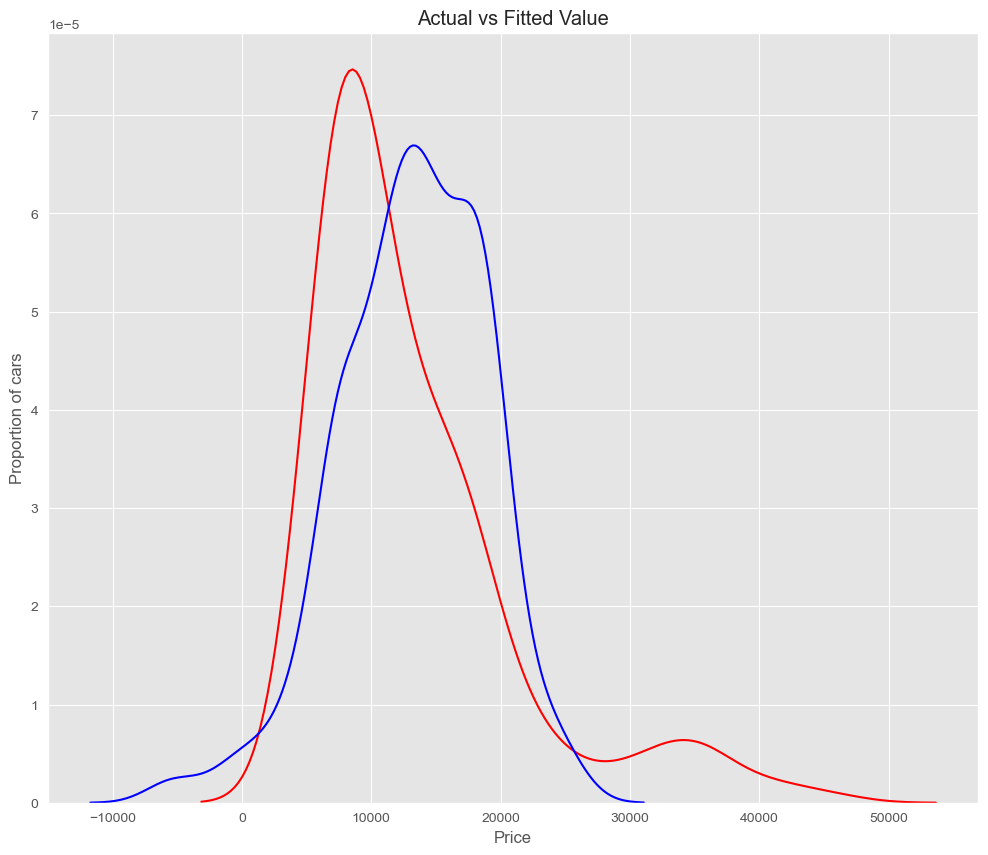

In [32]:
# Plotagem do grafico de distribuicao
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Value", ax=ax1)

plt.title("Actual vs Fitted Value")
plt.xlabel("Price")
plt.ylabel("Proportion of cars")

plt.show();

### Polynomial Regression and Pipelines
A regressao polinomial eh um caso particular da regressao linear ou regressao linear multipla.

Conseguimos obter relacoes nao lineares ao fazer a elevacao ao quadrado ou de ordem superior das variaveis preditoras.

In [36]:
# Regressao polinomial
def PlotPoly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title("Polynomial Fit for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    plt.show()
    plt.close();

In [37]:
x = df['highway-mpg']
y= df['price']

In [38]:
# Ajuste do modelo polinomial, onde iremos usar a funcao "polyfit" para fazer o ajuste, e a funcao "poly1d" para exibir a funcao polinomial
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


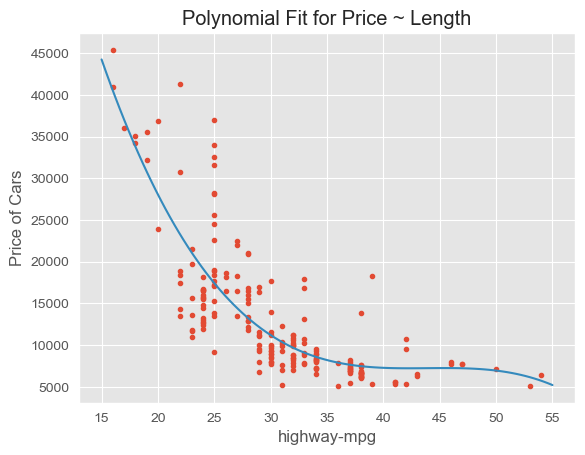

In [39]:
# Exibir o grafico
PlotPoly(p, x, y, 'highway-mpg')

In [40]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Podemos ver que esse modelo polinomial tem um ajuste aos dados muito mais adequado que o modelo linear.

#### Criar uma regressao polinomial de ordem 11

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


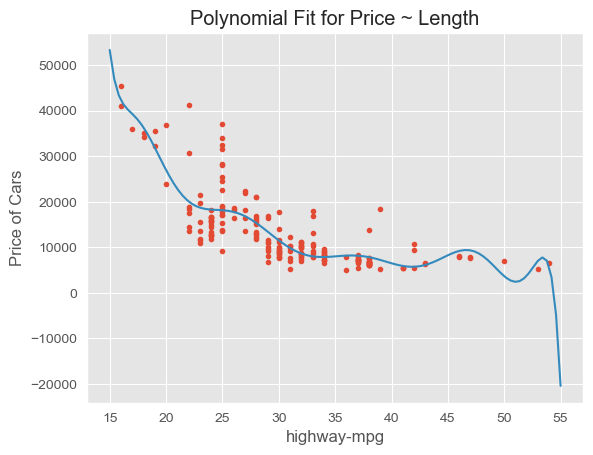

In [41]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPoly(p1, x, y, 'highway-mpg')

### Pipeline
Data Pipelines simplificam a etapa de processamento dos dados. Usamos o modulo __Pipeline__ para criar um pipeline. Tambem usamos __StandardScaler__ nesse pipe.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# Criar caracteristicas polinomiais de grau 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [47]:
Z_pr = pr.fit_transform(Z)

In [48]:
# Nos dados originais, existem 201 amostras e 2 caracteristicas
Z.shape

(201, 2)

In [49]:
# Apos a transformacao, temos 201 amostras e 6 caracteristicas
Z_pr.shape

(201, 6)

In [50]:
# Criacao do pipeline
input = [('scaler', StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

In [51]:
# Inputar o input, que eh a lista de argumentos acima, dentro do pipeline.
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
# Normalizar os dados, fazer a transformacao e ajustar o modelo.
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [53]:
# Podemos fazer tudo isso, e a predicao ao mesmo tempo
ypipe = pipe.predict(Z)
ypipe[:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

### Medidas de avaliacao

In [56]:
# Metrica R-squared
lm.fit(X, y)
# Find the R^2
print('The R-square is: ', lm.score(X, y))

The R-square is:  0.7609686443622008


Esse resultado nos permite dizer que 76% da variacao dos dados eh explicada por esse modelo.

In [57]:
## MSE
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
mse = mean_absolute_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  2795.449760620882
